# IMPORT REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
from imageio import imread

import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
xdf = pd.read_csv("games.csv")

In [3]:
xdf

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [4]:
xdf.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [5]:
xdf.shape

(1512, 14)

1512 rows of data and 14 variables

In [6]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


# Removing unnecessary columns/variables

In [7]:
dataG = xdf[[
      'Title',
      'Release Date',
      'Number of Reviews',
      'Genres',
      'Summary',
      'Reviews',
      'Rating',
      'Playing',
      'Backlogs',
      'Wishlist',
      'Plays']]
dataG.head()

,Title,Release Date,Number of Reviews,Genres,Summary,Reviews,Rating,Playing,Backlogs,Wishlist,Plays
0,Elden Ring,"Feb 25, 2022",3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",4.5,3.8K,4.6K,4.8K,17K
1,Hades,"Dec 10, 2019",2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,4.3,3.2K,6.3K,3.6K,21K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,4.4,2.5K,5K,2.6K,30K
3,Undertale,"Sep 15, 2015",3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,4.2,679,4.9K,1.8K,28K
4,Hollow Knight,"Feb 24, 2017",3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",4.4,2.4K,8.3K,2.3K,21K


# DATA CLEANING (Handling of NULL rows)

In [8]:
dataG.isnull().sum()

Title                 0
Release Date          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Rating               13
Playing               0
Backlogs              0
Wishlist              0
Plays                 0
dtype: int64

In [9]:
dataG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Number of Reviews  1512 non-null   object 
 3   Genres             1512 non-null   object 
 4   Summary            1511 non-null   object 
 5   Reviews            1512 non-null   object 
 6   Rating             1499 non-null   float64
 7   Playing            1512 non-null   object 
 8   Backlogs           1512 non-null   object 
 9   Wishlist           1512 non-null   object 
 10  Plays              1512 non-null   object 
dtypes: float64(1), object(10)
memory usage: 130.1+ KB


In [10]:
#removing rows with NULL value
#for example, games with no reviews

In [11]:
#drop all NULL values
dataG=dataG.dropna()

#reset index rows of dataframe to avoid non-consecutive index values
dataG=dataG.reset_index(drop=True)

print(f"Shape of new dataset is: {dataG.shape}")

Shape of new dataset is: (1499, 11)


In [12]:
#there were 13 rows wil null values
#Double checking if there are any null values left in the dataset
dataG.isnull().values.any()


False

# DATA CLEANING

# Changing of String release of Date to integer datatype with year only

In [13]:
#Extract year from release data and drop Release date column
import datetime

def extract_year(date_str):
    try:
        date_object = datetime.datetime.strptime(date_str, "%b %d, %Y")
        return date_object.year
    except ValueError:
        return pd.NA  # Handle potential format errors (optional)

dataG['Year'] = dataG['Release Date'].apply(extract_year)
#dataG.drop('Release Date',axis=1) 
data=dataG.drop('Release Date',axis=1) 
data.head()

,Title,Number of Reviews,Genres,Summary,Reviews,Rating,Playing,Backlogs,Wishlist,Plays,Year
0,Elden Ring,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",4.5,3.8K,4.6K,4.8K,17K,2022
1,Hades,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,4.3,3.2K,6.3K,3.6K,21K,2019
2,The Legend of Zelda: Breath of the Wild,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,4.4,2.5K,5K,2.6K,30K,2017
3,Undertale,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,4.2,679,4.9K,1.8K,28K,2015
4,Hollow Knight,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",4.4,2.4K,8.3K,2.3K,21K,2017


In [14]:
data.isnull().values.any()

True

In [15]:
#Release date column contain strings with "releases on TBD" which means the game has not been released yet
#extracting the year from this column cause this string value to be null and now we also have to remove the rows containing it
#drop all NULL values
data=data.dropna()

#reset index rows of datframe to avoid non-consecutive index values
data=data.reset_index(drop=True)

#convert date column from string to int
data['Year']=data['Year'].astype(int)
#df['points'] = df['points'].astype(str).astype(int)

print(f"Shape of new dataset is: {data.shape}")


Shape of new dataset is: (1497, 11)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1497 non-null   object 
 1   Number of Reviews  1497 non-null   object 
 2   Genres             1497 non-null   object 
 3   Summary            1497 non-null   object 
 4   Reviews            1497 non-null   object 
 5   Rating             1497 non-null   float64
 6   Playing            1497 non-null   object 
 7   Backlogs           1497 non-null   object 
 8   Wishlist           1497 non-null   object 
 9   Plays              1497 non-null   object 
 10  Year               1497 non-null   int32  
dtypes: float64(1), int32(1), object(9)
memory usage: 122.9+ KB


# Changing of string values to integers value for numerical variables

In [17]:
# Converts the numbers with K to multiple by 1000 and convert into whole integers since K = 1000. Eg. 1K = 1 * 1000
def extract_value(value_str):
    if value_str.upper().endswith('K'):
        value_str = value_str[:-1]
        value_num = float(value_str) * 1000
    else:
        value_num = float(value_str)
    return value_num


# Combining columns/variables to create new variables

In [18]:
games_clean = data.copy()

#replaces K for 1000
games_clean["Backlogs"] = games_clean["Backlogs"].str.replace("K","000")
games_clean["Backlogs"] = games_clean["Backlogs"].str.replace(".","")
games_clean["Wishlist"] = games_clean["Wishlist"].str.replace("K","000")
games_clean["Wishlist"] = games_clean["Wishlist"].str.replace(".","")

games_clean[['Backlogs', 'Wishlist']] = games_clean[['Backlogs', 'Wishlist']].apply(pd.to_numeric)

#combines column backlogs and wishlist
#for people who are interested
games_clean['Interested'] = games_clean["Backlogs"] + games_clean["Wishlist"]
games_clean['Playing']=games_clean['Playing'].apply(extract_value)
games_clean['Total Plays']=games_clean['Plays'].apply(extract_value)
games_clean['Review_count']=games_clean['Number of Reviews'].apply(extract_value)

#convert to float (except year) for consistency
games_clean['Playing']=games_clean['Playing'].astype(float)
games_clean['Interested']=games_clean['Interested'].astype(float)
games_clean['Total Plays']=games_clean['Total Plays'].astype(float)
games_clean['Review_count']=games_clean['Review_count'].astype(float)

#removes Playing, Backlogs, and Wishlist from df
games_clean.pop("Backlogs")
games_clean.pop("Wishlist")
#games_clean.pop("Playing")
games_clean.pop("Plays")
games_clean.pop("Number of Reviews")


games_clean.head()

,Title,Genres,Summary,Reviews,Rating,Playing,Year,Interested,Total Plays,Review_count
0,Elden Ring,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",4.5,3800.0,2022,94000.0,17000.0,3900.0
1,Hades,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,4.3,3200.0,2019,99000.0,21000.0,2900.0
2,The Legend of Zelda: Breath of the Wild,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,4.4,2500.0,2017,31000.0,30000.0,4300.0
3,Undertale,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,4.2,679.0,2015,67000.0,28000.0,3500.0
4,Hollow Knight,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",4.4,2400.0,2017,106000.0,21000.0,3000.0


In [19]:
# Check if there are any other NULL values
games_clean.info()
games_clean.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1497 non-null   object 
 1   Genres        1497 non-null   object 
 2   Summary       1497 non-null   object 
 3   Reviews       1497 non-null   object 
 4   Rating        1497 non-null   float64
 5   Playing       1497 non-null   float64
 6   Year          1497 non-null   int32  
 7   Interested    1497 non-null   float64
 8   Total Plays   1497 non-null   float64
 9   Review_count  1497 non-null   float64
dtypes: float64(5), int32(1), object(4)
memory usage: 111.2+ KB


False

# Adding columns from another column/variable for easier usage of data

In [20]:
split_Genres = games_clean.copy()

unique_genres = set()
for genres_str in split_Genres['Genres']:
    genres_list = eval(genres_str)  # Convert string representation of list to actual list
    unique_genres.update(genres_list)

# Create new columns for each unique genre
for genre in unique_genres:
    split_Genres[genre] = 0

# Iterate over each row to populate the new genre columns
for index, row in games_clean.iterrows():
    genres_list = eval(row['Genres'])  # Convert string representation of list to actual list
    for genre in genres_list:
        split_Genres.at[index, genre] = 1
        
#drop genre column
#split_Genres.pop("Genres")

In [21]:
#Check if there are any empty info in the data.
games_clean.isna().sum()

Title           0
Genres          0
Summary         0
Reviews         0
Rating          0
Playing         0
Year            0
Interested      0
Total Plays     0
Review_count    0
dtype: int64

In [22]:
games_clean=split_Genres.copy()

# NLP Part

Cleaning text from random unicode characters (In this case is the []), and keeping only letters, numbers, spaces. Applies to summary and reviews

In [23]:
def decode(column):
    column = column.str.decode("unicode_escape")\
    .str.replace(r'[^a-zA-Z1-9\ ]', '', regex=True).str.strip()
    return column

In [24]:
games_clean.loc[:,"Summary"] = decode(games_clean["Summary"])
games_clean.loc[:,"Reviews"] = decode(games_clean["Reviews"])

This part of the code removes ONLY completely non-english reviews, basically games with reviews that does not contain english. Games with reviews with english reviews will still stay.
It detects which reviews are in English. Puts the english reviews in a new dataframe called english_reviews

In [25]:
# Function to detect the language of a review using langid with confidence threshold
def detect_language_with_langdetect(line): 
    from langdetect import detect_langs
    try: 
        langs = detect_langs(line) 
        for item in langs: 
            # The first one returned is usually the one that has the highest probability
            return item.lang, item.prob 
    except: return "err", 0.0 

# Apply language detection to each review and add a 'IsEnglish' column to the DataFrame
games_clean['LanguageDetection'] = games_clean['Reviews'].apply(detect_language_with_langdetect)

#Filter out non-English reviews based on the threshold
english_reviews = games_clean[games_clean['LanguageDetection'].apply(lambda x: x[0] == 'en' and x[1] >= 0.8)]
games_clean = english_reviews

# Output the results with language and confidence percentages
# for idx, (lang, confidence) in enumerate(english_reviews['LanguageDetection']):
#     print(f"Review {idx + 1}: Language={lang}, Confidence={confidence:.2%}")

# print(games_clean)

Why not remove the Spanish Words? 
The sentiment values are still valid. As long as the review contains english words, the sentiment analysis will still use those english words and evaluate whether the reviews are positive or negative. From some games (Eg. 1482, Dragon Ball GT: Final Bout), the sentiment values were below 0, indicating a negative review. Although these reviews contained spanish words, the sentiment values were still correct judging by the english sentences that were in these reviews.

To make the sentiment value more useful, we will find games that are above 4.0 rating containing the top words from the summary of games extracted from positive reviews. This will give us a more accurate result of what are the top and popular/highly rated games the people are looking out for.

In [26]:
print(games_clean.tail(20).to_string())

                                Title                                                               Genres                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Resets the index after cleaning of random unicode characters is done

In [27]:
games_clean.reset_index(inplace=True, drop=True)
games_clean.head()

,Title,Genres,Summary,Reviews,Rating,Playing,Year,Interested,Total Plays,Review_count,...,Turn Based Strategy,Strategy,Indie,Visual Novel,Racing,Point-and-Click,Pinball,Shooter,Arcade,LanguageDetection
0,Elden Ring,"['Adventure', 'RPG']",Elden Ring is a fantasy action and open world ...,The first playthrough of elden ring is one of ...,4.5,3800.0,2022,94000.0,17000.0,3900.0,...,0,0,0,0,0,0,0,0,0,"(en, 0.9999974237735859)"
1,Hades,"['Adventure', 'Brawler', 'Indie', 'RPG']",A roguelite hack and slash dungeon crawler in ...,convinced this is a roguelike for people who d...,4.3,3200.0,2019,99000.0,21000.0,2900.0,...,0,0,1,0,0,0,0,0,0,"(en, 0.9999973760981882)"
2,Undertale,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A small child falls into the Underground where...,soundtrack is tied for 1 with nier automata a...,4.2,679.0,2015,67000.0,28000.0,3500.0,...,1,0,1,0,0,0,0,0,0,"(en, 0.9999968335588029)"
3,Hollow Knight,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,this games worldbuilding is incredible with it...,4.4,2400.0,2017,106000.0,21000.0,3000.0,...,0,0,1,0,0,0,0,0,0,"(en, 0.9999971373031296)"
4,Minecraft,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it Unfortunately...,4.3,1800.0,2011,11230.0,33000.0,2300.0,...,0,0,0,0,0,0,0,0,0,"(en, 0.8571391115054408)"


Processes incoming text data using spacy to determine the base form of each word in summary & reviews, then returns a list of lemmatized words.  
Lemmatized words are one single form word.
Eg.  "builds", "building",or "built" to the lemma "build"

In [28]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(text):
    doc = nlp(text)
    tokens = [token for token in doc if not token.is_punct]
    lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
    return lemmas

# games_clean['Reviews'] = games_clean['Reviews'].apply(lemmatize)

Here, we are using TextBlob to indicate whether the reviews in the dataset lean towards positive or negative. 
If a sentiment value is above 0, it means it is a positive review.
If it's below 0, it indicates a negative value.
The range of sentiment value is [-1, 1]. The value that is closer to -1 or 1 indicates stronger positive/negative sentiments.

In [29]:
from textblob import TextBlob

# Function to calculate sentiment polarity using TextBlob
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply sentiment analysis to each review and add a 'Sentiment' column to the DataFrame
games_clean['Sentiment'] = games_clean['Reviews'].apply(get_sentiment)

# Filter positive reviews based on sentiment polarity
positive_reviews = games_clean[games_clean['Sentiment'] > 0]['Reviews']

Converts text data to TF-IDF vectors.
 
TF-IDF is a measure that "evaluates how relevant a word is to a document in a collection of documents". It increases proportionally to the number of times a word appears in a dataset, but is offset by the number of datasets that contain the word.
Example: Words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.

This code creates a matrix with TF-IDF weights for each word. 
Obtains a list of feature names that represent which words are included in these vectors. 

Instead of comparing multiple datasets, will try comparing between reviews and summary to determine the relevancy of the words. From there, can roughly determine which words are relevant and appear very frequently, giving us a gauge of what kind of games people usually prefer and what kind of audience the games generally cater to.

Now let's do it for reviews. Here we are using only positive reviews to get a gauge of what kind of games people usually praise


In [30]:
tfidf_positive = TfidfVectorizer(stop_words="english", tokenizer=lemmatize) #Reduces common words like 'and', 'the' etc as it is not significant.
tfidf_matrix_positive = tfidf_positive.fit_transform(positive_reviews)
feature_names_positive = tfidf_positive.get_feature_names_out()

In [31]:
# Calculate TF-IDF scores for each word in the positive reviews.
tfidf_scores_positive = tfidf_matrix_positive.sum(axis=0)

# Create a DataFrame to display common words and their TF-IDF scores in positive reviews.
common_words_positive = pd.DataFrame(tfidf_scores_positive, columns=feature_names_positive).transpose()
common_words_positive.columns = ['TF-IDF Score']

# Filter out empty strings and whitespace characters.
common_words_positive = common_words_positive[common_words_positive.index.str.strip() != '']

# Filter out specifc number of letters from words. 4 because 1-4 words usually consists of generic words that are redundant.
common_words_positive = common_words_positive[common_words_positive.index.str.len() > 4]

# Sort the DataFrame by TF-IDF score in descending order.
common_words_positive = common_words_positive.sort_values(by='TF-IDF Score', ascending=False)

# Display top common words without blank spaces and single-letter words.
top_common_words_positive = common_words_positive.head(20)
print(top_common_words_positive)

            TF-IDF Score
really         34.804534
story          30.300512
great          27.617662
character      24.803068
gameplay       23.430248
think          21.859081
pretty         20.263797
level          20.025679
world          17.382073
series         16.921583
design         16.892618
combat         16.820519
mario          16.815083
experience     16.321098
thing          14.542545
little         13.839098
enjoy          13.628626
amazing        13.612418
favorite       13.414189
original       12.886147


The code below extracts key words from Summary. The summary selected are from the positive reviews that we have identified previously. This would give a better gauge of what types of games the people are favouring based on the summary of the game description.

In [32]:
# Filter games with positive reviews.
positive_games = games_clean[games_clean['Sentiment'] > 0]

# Extract Summary text from games with positive reviews
positive_summary_text = positive_games['Summary']

In [33]:
tfidf_positive_summary = TfidfVectorizer(stop_words="english", tokenizer=lemmatize)
tfidf_matrix_positive_summary = tfidf_positive_summary.fit_transform(positive_summary_text)
feature_names_positive_summary = tfidf_positive_summary.get_feature_names_out()

In [34]:
non_empty_feature_indices = [i for i, name in enumerate(feature_names_positive_summary) if name.strip() != '']

# Filter the TF-IDF matrix and feature names
tfidf_matrix_filtered = tfidf_matrix_positive_summary[:, non_empty_feature_indices]
feature_names_filtered = [feature_names_positive_summary[i] for i in non_empty_feature_indices]

In [35]:
# Calculate TF-IDF scores for each word in the positive summary text
tfidf_scores_positive_summary = tfidf_matrix_positive_summary.sum(axis=0)

# Create a DataFrame to display common words and their TF-IDF scores in positive summary text
common_words_positive_summary = pd.DataFrame(tfidf_scores_positive_summary, columns=feature_names_positive_summary).transpose()
common_words_positive_summary.columns = ['TF-IDF Score']

# Filter out empty strings and whitespace characters (optional)
common_words_positive_summary = common_words_positive_summary[common_words_positive_summary.index.str.strip() != '']

# Filter out specific number of letters from words (optional)
common_words_positive_summary = common_words_positive_summary[common_words_positive_summary.index.str.len() > 4]

# Sort the DataFrame by TF-IDF score
common_words_positive_summary = common_words_positive_summary.sort_values(by='TF-IDF Score', ascending=False)

# Display the top common words in positive summary text without blank spaces and single-letter words
top_common_words_positive_summary = common_words_positive_summary.head(20)
print(top_common_words_positive_summary)

            TF-IDF Score
player         29.985801
world          27.523639
character      20.279782
story          19.817681
mario          18.510837
series         18.409172
adventure      18.206607
feature        18.115132
pokmon         16.100944
action         15.962623
experience     15.554189
fight          15.269581
battle         14.720572
gameplay       14.646103
explore        13.837290
enemy          12.771064
combat         12.510228
super          12.017618
power          11.855943
version        11.784294


In [36]:
positive_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 1413
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1185 non-null   object 
 1   Genres               1185 non-null   object 
 2   Summary              1185 non-null   object 
 3   Reviews              1185 non-null   object 
 4   Rating               1185 non-null   float64
 5   Playing              1185 non-null   float64
 6   Year                 1185 non-null   int32  
 7   Interested           1185 non-null   float64
 8   Total Plays          1185 non-null   float64
 9   Review_count         1185 non-null   float64
 10  Tactical             1185 non-null   int64  
 11  Puzzle               1185 non-null   int64  
 12  Adventure            1185 non-null   int64  
 13  Brawler              1185 non-null   int64  
 14  RPG                  1185 non-null   int64  
 15  MOBA                 1185 non-null   i

In [37]:
from sklearn.cluster import KMeans

# Step 3: Feature Selection
features = positive_games[['Rating', 
                 'Interested', 
                 'Playing']]

# Use K-means clustering to identify groups of similar games based on the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
#pipeline = make_pipeline(StandardScaler(), kmeans)
kmeans.fit(features)
#clusters = pipeline.fit_predict(features)
cluster3_1 = kmeans.predict(features)

According to the correlation matrix, The players who are interested but have not played the game and the people who are currently still playing the game have a moderately positive strong relation R=0.65
That means, the more people who are interested in playin the game, the more people who would be currently playing in this period of time. 
Regardless of the weak relationship between Ratings and these 2 variables, I wanted to use them in a cluster together to provide insight in the games' current success via number of players still playing their game and their rating (performace and appeal) while also looking for its potential for growth.
Games with high player engagement and a large number of interested players may represent high-demand titles.

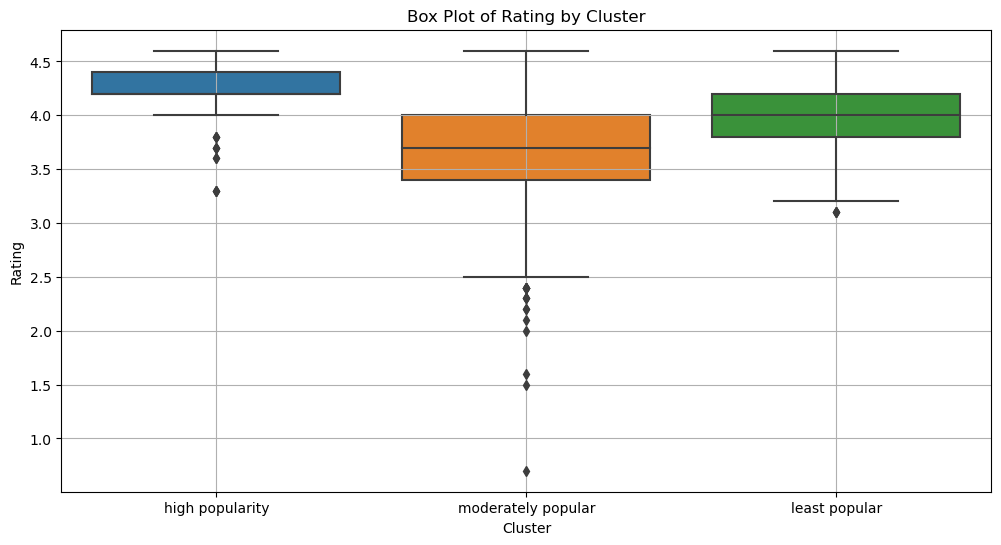

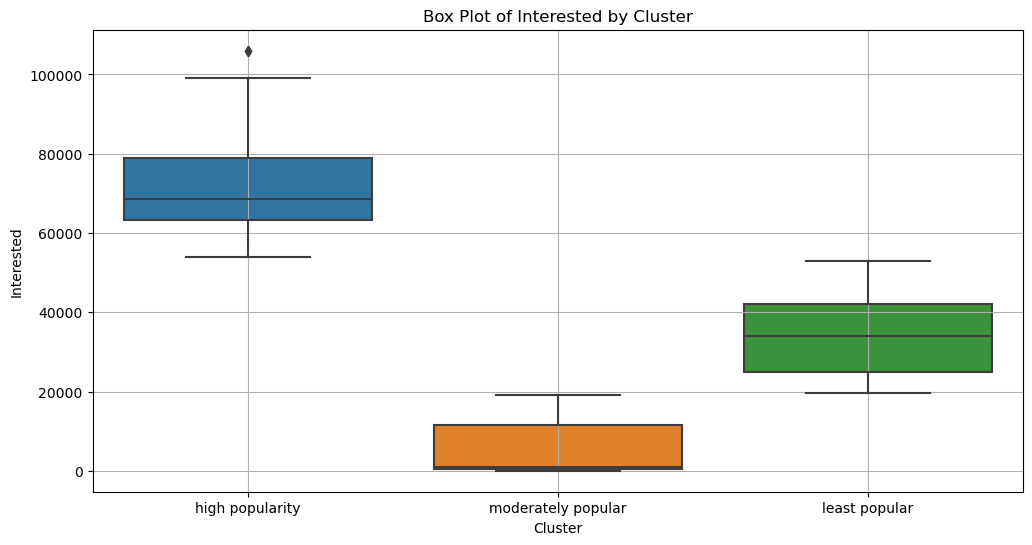

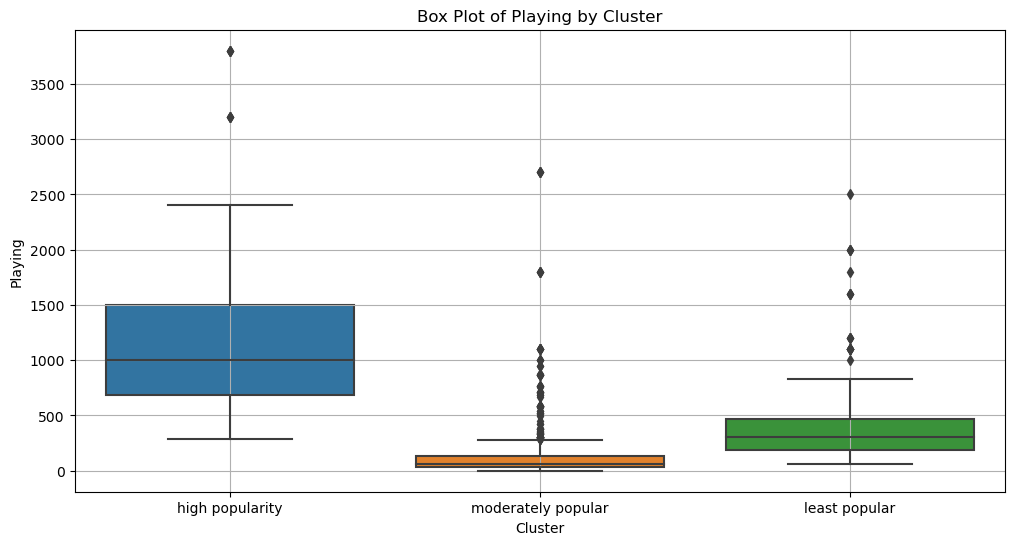

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cluster_labels = {0: 'least popular', 1: 'moderately popular', 2: 'high popularity'}

positive_games['cluster3_1']=cluster3_1
# Create box plots for each feature, grouped by cluster
for feature in features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['cluster3_1'].map(cluster_labels), y=feature, data=positive_games)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

I chose to have 3 groups for the cluster to represent 3 things

0. Games that have no player engagement or potentially just niche games (due to low number of potential players), furthermore with mixed or mostly low ratings compared to the other games
1. Moderately Engaged games with growth potential. This group has moderate player engagement and moderate number of people who are interested in playing while having mixed rating with mostly high rating compared to the rest of the games
2. Games that Highly engaged and strong interest from potential players while also performing well with its high ratings
Games from group 0 are likely to have limited success in the market. These games have low player engagement and a small number of potential players interested in playing them. Furthermore, their mixed or mostly low ratings suggest that they may not appeal to a broad audience and may be considered niche or less popular games.

Group 1 represents games with moderate player engagement and growth potential. While these games may not have the same level of success as those in group 2, they still have a decent level of player engagement and interest from potential players. Their mixed ratings indicate that they have potential for improvement and could attract a larger audience with targeted marketing or updates.

Games from group 2 represent strong candidates for success in the market, as they have already demonstrated high levels of engagement among current players and strong interest from potential players. Additionally, their positive ratings indicate that they are well-received by players, further increasing their likelihood of success.

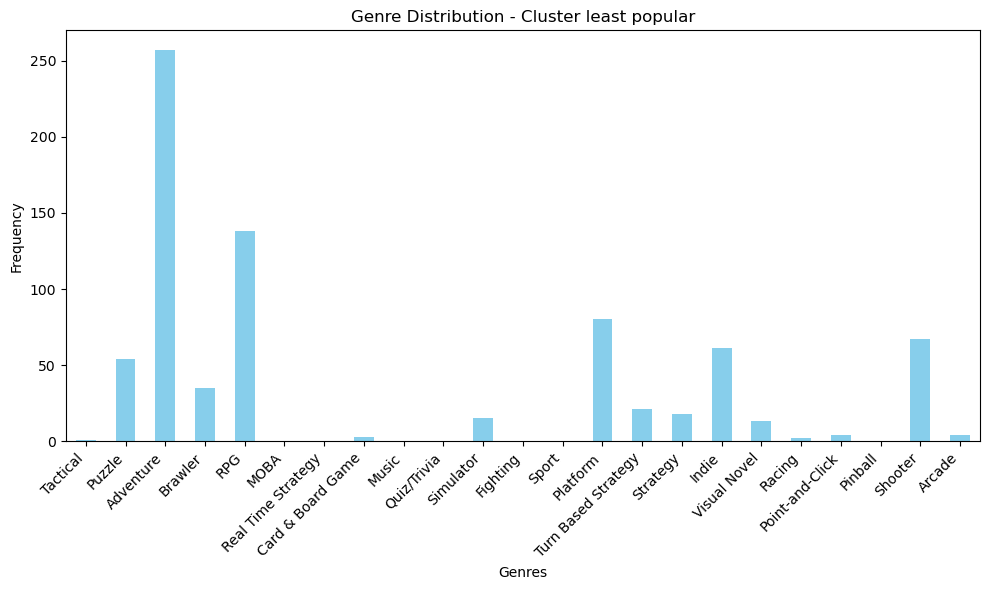

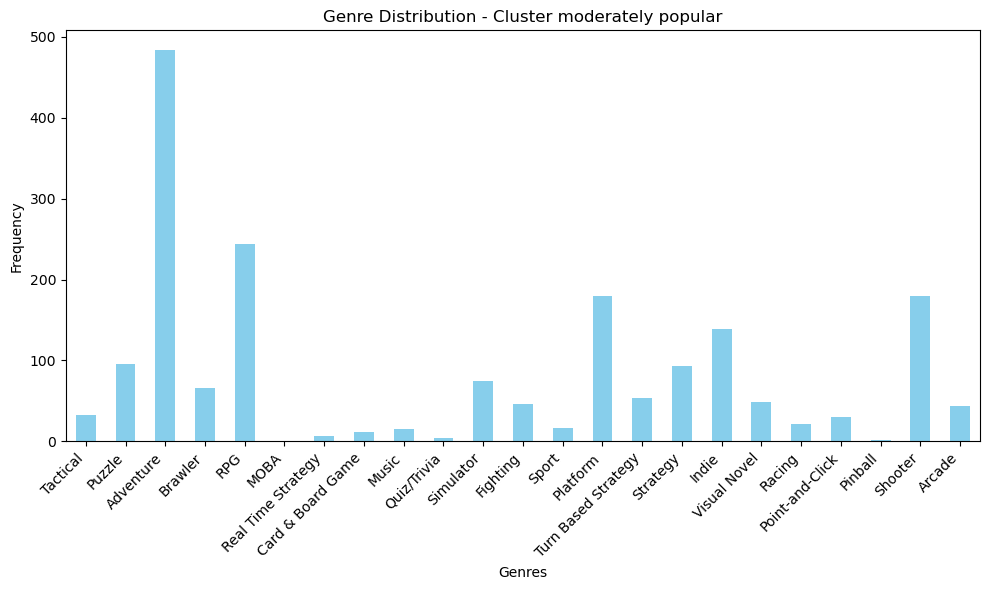

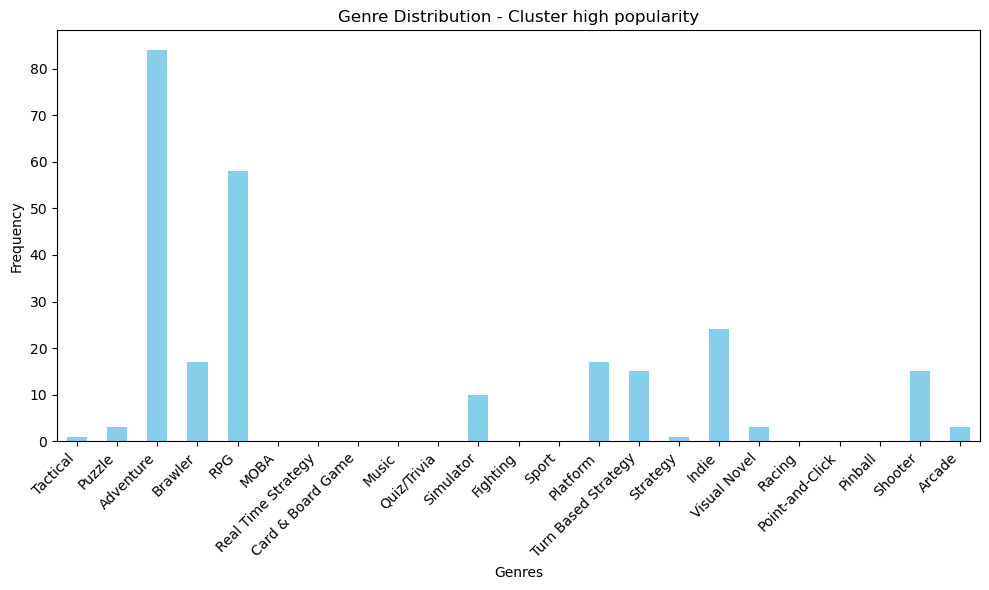

In [39]:
genre_columns = positive_games.columns[10:33]#first genre in col 10 to col 33
genre_data = positive_games[genre_columns]
grouped_data = positive_games.groupby('cluster3_1')

# Plot bar charts for each cluster
for cluster, group in grouped_data:
    # Calculate genre frequencies within the cluster
    cluster_genre_frequencies = group[genre_columns].sum()
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    cluster_genre_frequencies.plot(kind='bar', color='skyblue')
    
    # Customize plot labels and title
    plt.title(f'Genre Distribution - Cluster {cluster_labels[cluster]}')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap of labels
    plt.show()

In [40]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features, cluster3_1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6744981050765214


 The silhouette score measures how well-separated the clusters are. It ranges from -1 to 1, where a score closer to 1 indicates that data points are well-clustered, a score around 0 suggests overlapping clusters, and negative scores indicate that data points may have been assigned to the wrong clusters.
 
A silhouette score of 0.67 indicates a relatively good clustering result. It indicates that the majority of data points are well-clustered and assigned to the correct clusters, with some potential for improvement. It also suggests that the clustering algorithm has successfully separated the data into distinct clusters with relatively minimal overlap. However, further analysis and refinement may still be beneficial to optimize the clustering results.

# IMPROVING CLUSTER

I wanted to see if adding more variables for the clusters would help to seperate the genres better.
hence, I decided to cluster games based on variables review count, interest level, current player count, total player count, and rating.

The first 4 variable have at least correlation 0.65 with each other which means they are all highly correlated which indicates that they share similar patterns or trends in the data. This better ensures that games with similar levels of engagement across multiple dimensions are grouped together, leading to more cohesive and meaningful clusters.

Furthermore, by including multiple variables that measure different aspects of player engagement (reviews_count, interest, and active player counts, total number of people who have played), the resulting clusters provide a more comprehensive representation of game engagement. This allows for a more nuanced understanding of player behavior and preferences.

Review count, interest level, and player counts represent different facets of a game's popularity and appeal. Review count reflects the level of feedback and attention the game has received from players, while interest level and player counts indicate the level of current and past player engagement.

Adding the rating variable to the clustering analysis, despite its low correlation with the other variables would still add value for the clustering. Ratings provide a direct measure of the perceived quality or satisfaction level of a game among players. Even if ratings are not strongly correlated with other variables such as player engagement or interest, they still offer valuable information about the overall reception and success of a game.

The 3 groups will still represent the same things as the previous cluster

In [41]:
positive_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 1413
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1185 non-null   object 
 1   Genres               1185 non-null   object 
 2   Summary              1185 non-null   object 
 3   Reviews              1185 non-null   object 
 4   Rating               1185 non-null   float64
 5   Playing              1185 non-null   float64
 6   Year                 1185 non-null   int32  
 7   Interested           1185 non-null   float64
 8   Total Plays          1185 non-null   float64
 9   Review_count         1185 non-null   float64
 10  Tactical             1185 non-null   int64  
 11  Puzzle               1185 non-null   int64  
 12  Adventure            1185 non-null   int64  
 13  Brawler              1185 non-null   int64  
 14  RPG                  1185 non-null   int64  
 15  MOBA                 1185 non-null   i

In [42]:
from sklearn.cluster import KMeans

# Step 3: Feature Selection
features2 = positive_games[['Rating', 
                 'Interested', 'Review_count',
                 'Playing', 'Total Plays']]

# Use K-means clustering to identify groups of similar games based on the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features2)
cluster5_2 = kmeans.predict(features2)

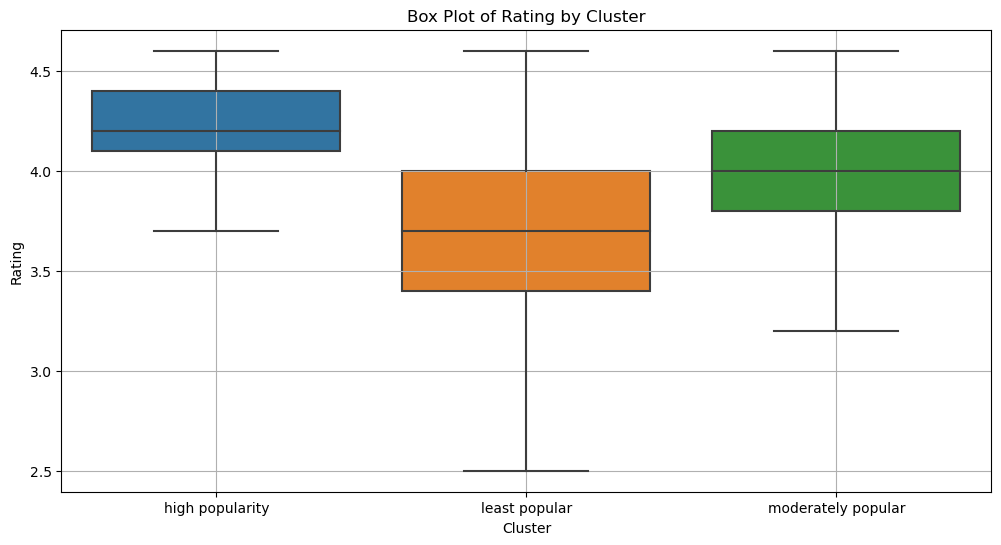

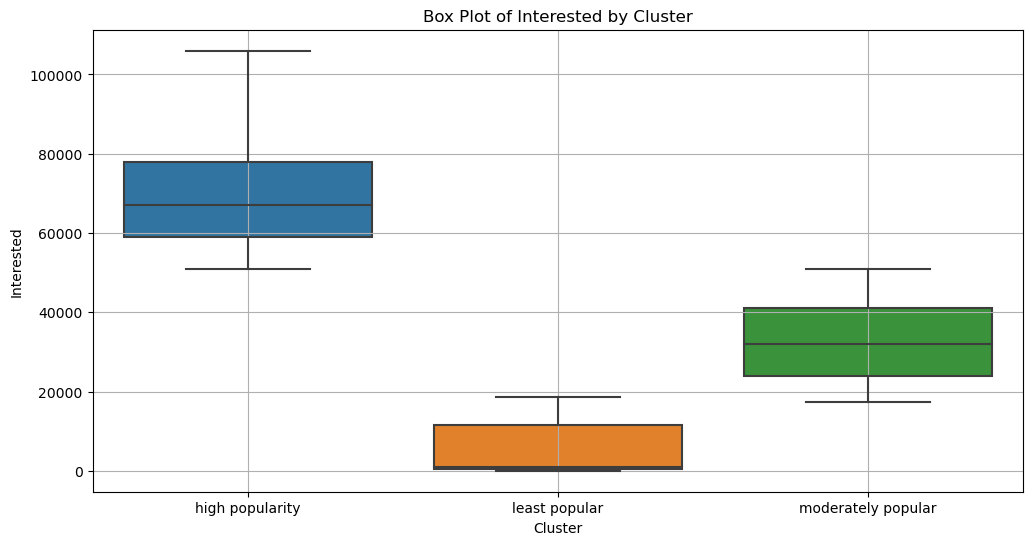

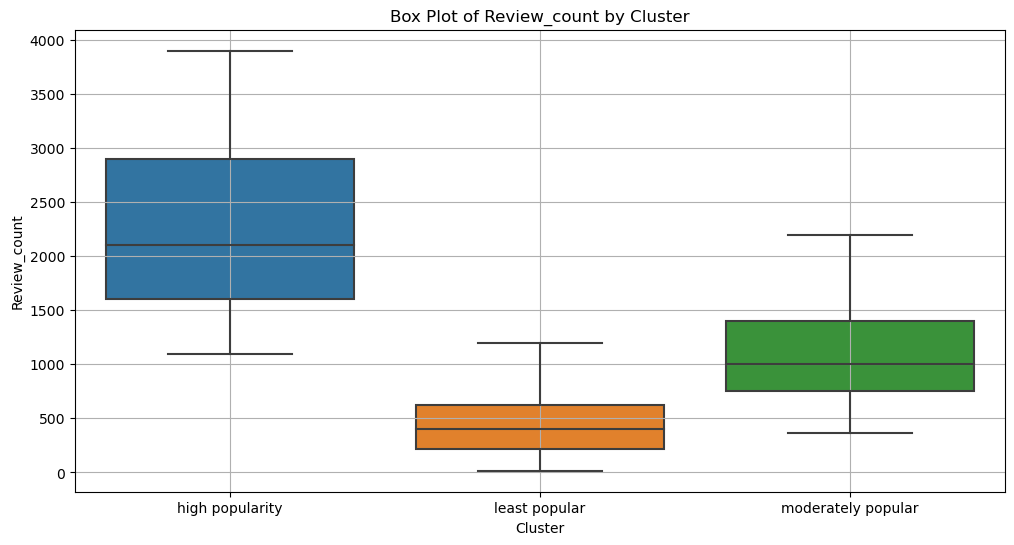

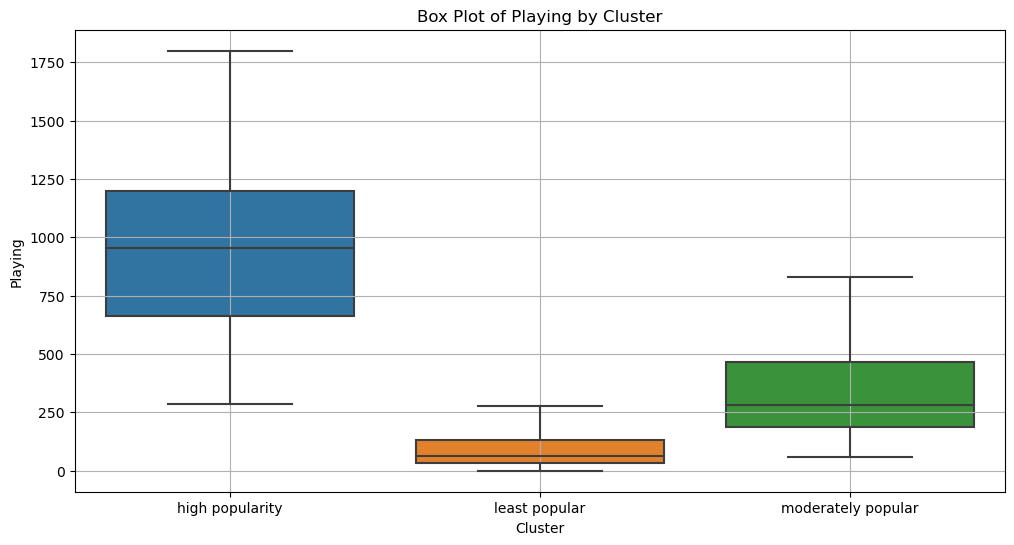

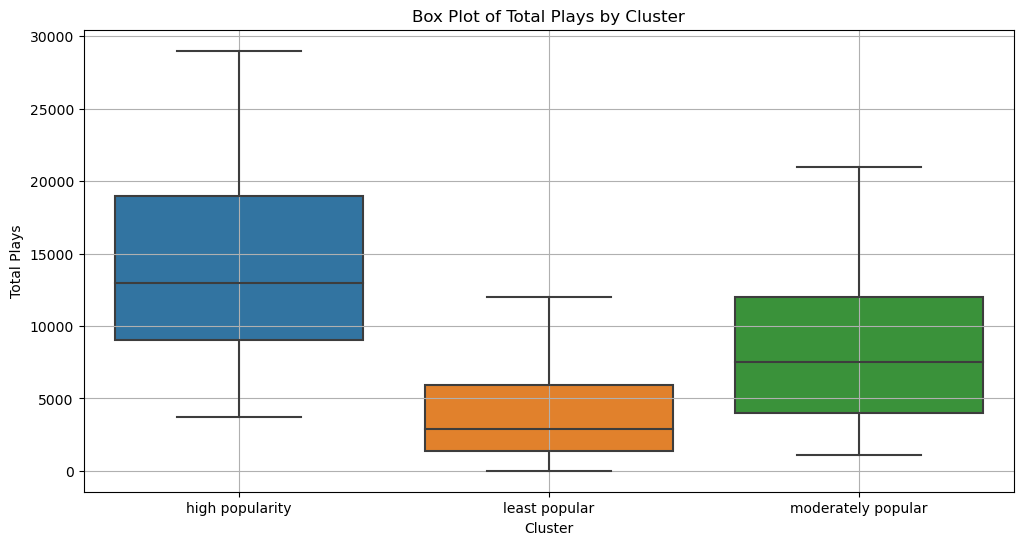

In [43]:
positive_games['cluster5_2']=cluster5_2
# Create box plots for each feature, grouped by cluster
cluster_labels = {0: 'least popular', 2: 'moderately popular', 1: 'high popularity'}

for feature in features2:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['cluster5_2'].map(cluster_labels), y=feature, data=positive_games,showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

In [44]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features2, cluster5_2)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5991812857663237


I have decided to remove total plays from cluster as it is the variable with the most overlapping clusters as it lowered the silhouette score from before

In [45]:
# Step 3: Feature Selection
features3 = positive_games[['Rating', 
                 'Interested', 'Review_count',
                 'Playing']]

# Use K-means clustering to identify groups of similar games based on the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features3)
cluster4_3 = kmeans.predict(features3)

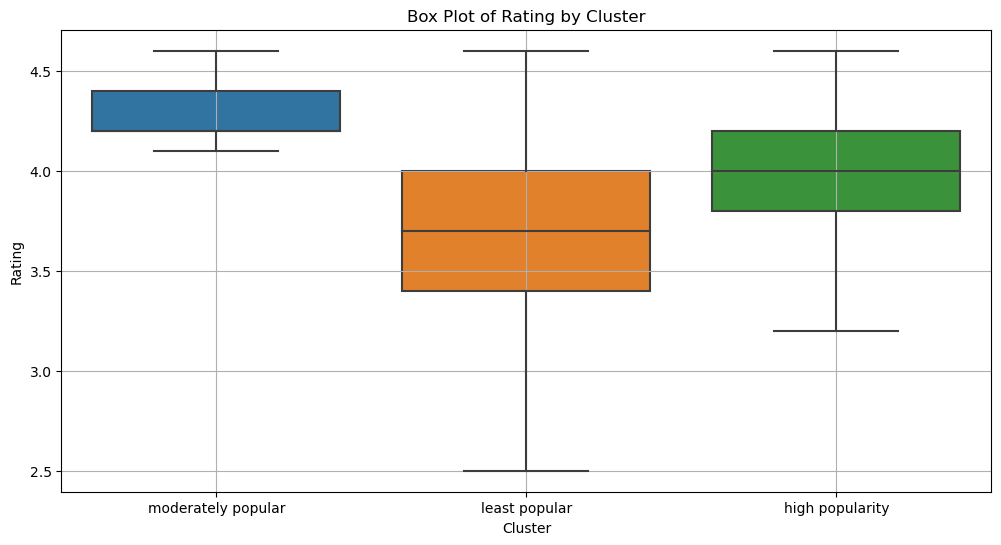

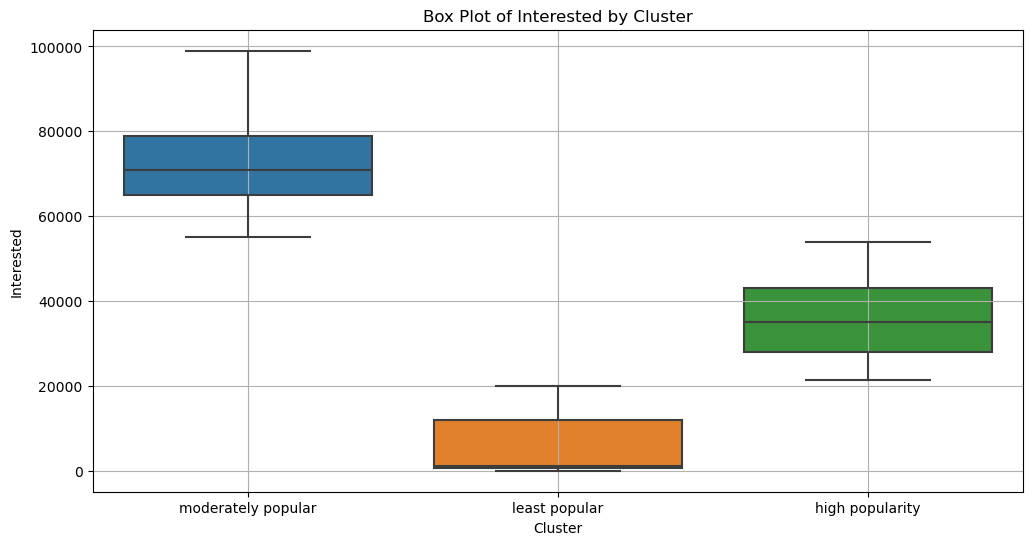

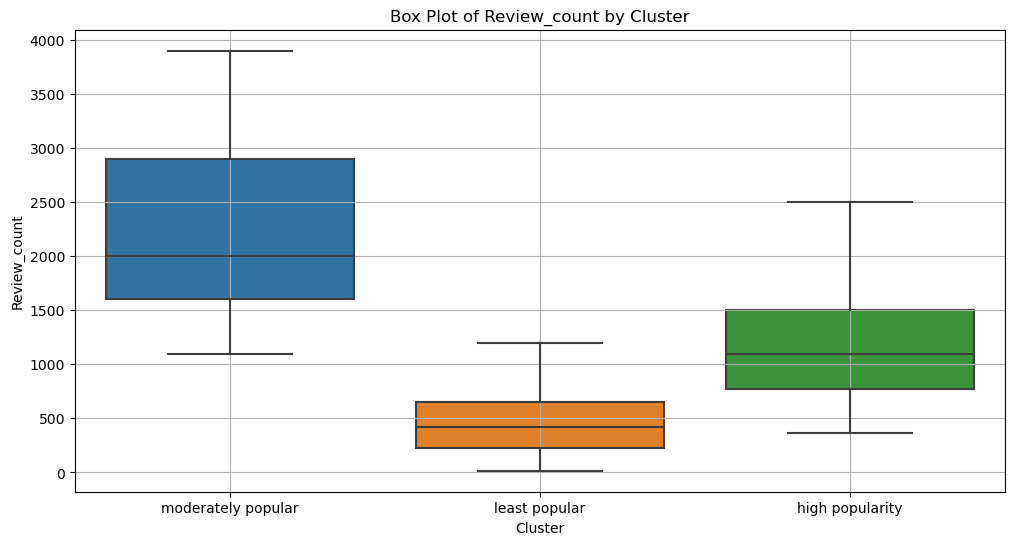

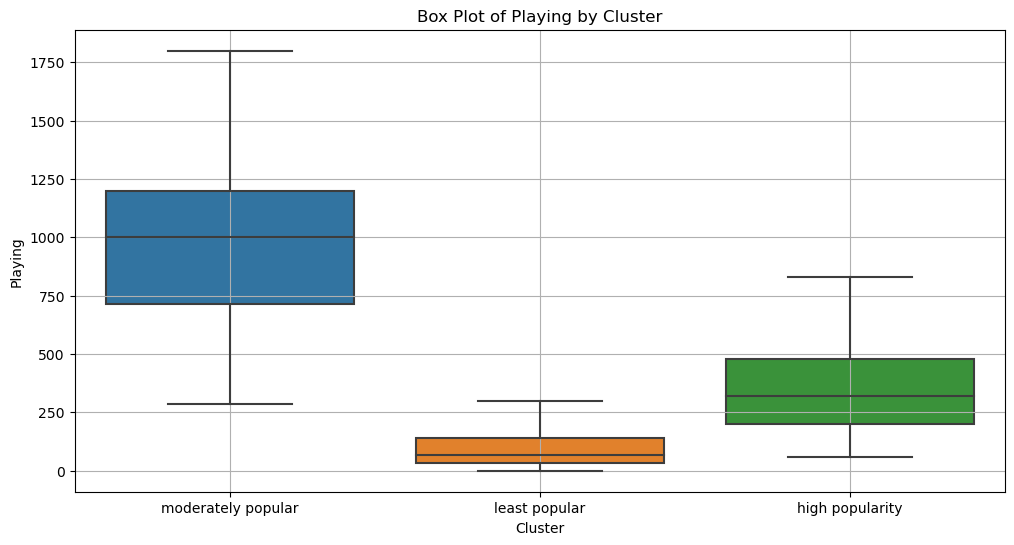

In [46]:
positive_games['cluster4_3']=cluster4_3
# Create box plots for each feature, grouped by cluster
cluster_labels = {0: 'least popular', 2: 'moderately popular', 1: 'high popularity'}

for feature in features3:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['cluster4_3'].map(cluster_labels), y=feature, data=positive_games,showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

In [47]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, cluster4_3)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6789932785160542


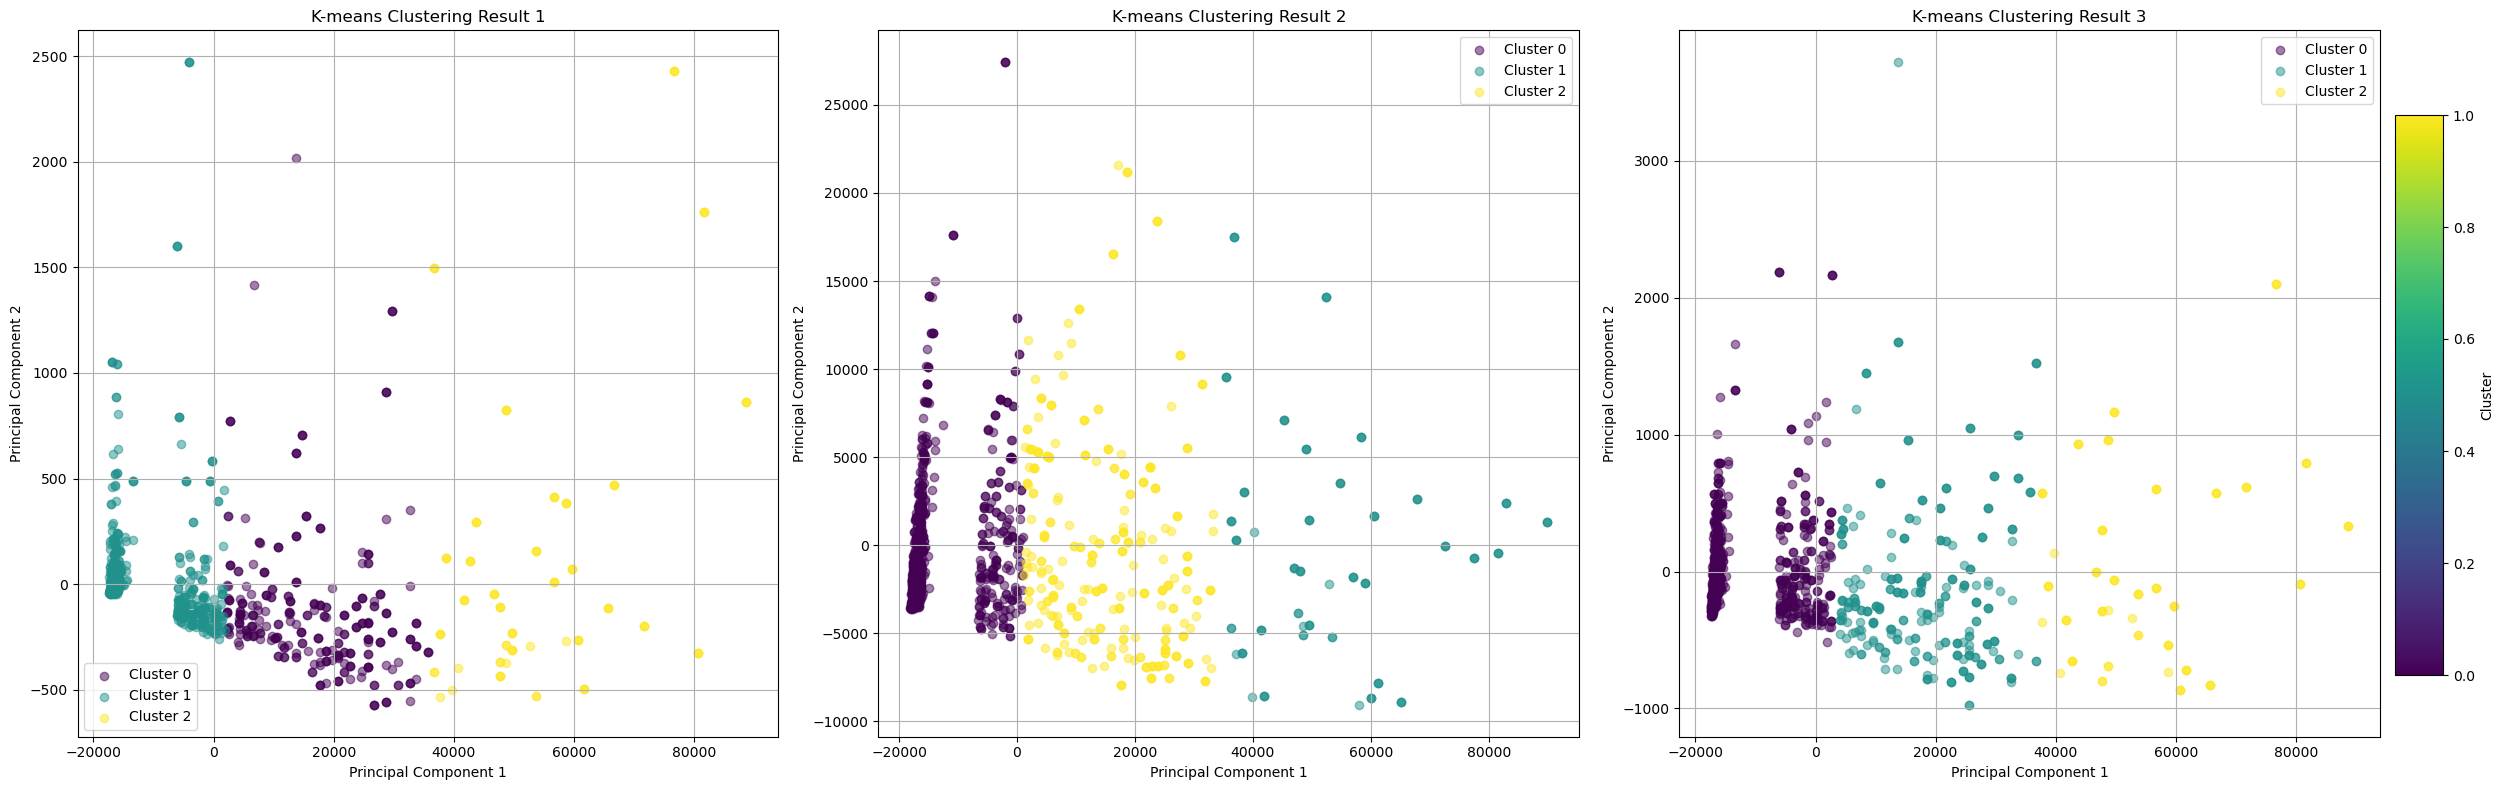

In [48]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(24,8))

# Define unique colors for each cluster
unique_labels = np.unique(cluster3_1)  # Assuming 'cluster1' has the same labels as the other clusters
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Loop through each clustering result and visualize it in a separate subplot
for i, (features, cluster_labels) in enumerate(zip([features, features2, features3], [cluster3_1, cluster5_2, cluster4_3])):
    # Perform PCA to reduce the dimensionality
    pca = PCA(n_components=2)
    features_reduced = pca.fit_transform(features)
    
    # Plot data points with cluster assignments
    for label, color in zip(unique_labels, colors):
        indices = cluster_labels == label
        axes[i].scatter(features_reduced[indices, 0], features_reduced[indices, 1], c=color, cmap='viridis', alpha=0.5, label=f'Cluster {label}')
    
    # Add labels and title
    axes[i].set_xlabel('Principal Component 1')
    axes[i].set_ylabel('Principal Component 2')
    axes[i].set_title(f'K-means Clustering Result {i+1}')
    axes[i].grid(True)
    axes[i].legend()  # Add legend

# Add color bar legend to the last subplot
plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), cax=cbar_ax, label='Cluster')

plt.tight_layout()
plt.show()

After evaluating the silhouette scores for all three KMeans clustering results, I noticed that the clusters with 3 and 4 variables were around the same value. This suggests that the clustering quality across these 2 different sets of features is comparable. However, since the clustering with all 4 variables provides the most comprehensive representation of the data, capturing various aspects such as rating, user interest, review count, and player engagement, I have decided to proceed with this clustering result.

Additionally, I will experiment with different values of Hyperparameter Tuning and trying different clustering algos to determine if it influences the clustering quality and potentially leads to an improvement in the silhouette score. This approach aims to ensure robustness and consistency in the clustering analysis."

# HYPERPARAMETER TUNING

In [49]:
# Use K-means clustering to identify groups of similar games based on the selected features
#kmeans = KMeans(n_clusters=3, random_state=100,n_init=10, init='k-means++', max_iter=300)
kmeans = KMeans(n_clusters=3, random_state=10000)
kmeans.fit(features3)
clusters = kmeans.predict(features3)

In [50]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, clusters)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6712285053044453


The only hyperparamter that helped to imporved the score is changing the random_state from 42 to 100.
This might have help to reduce noise for this datset that has outliers.

# TRYING DIFFERENT CLUSTERING ALGOS

In [51]:
# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_H1 = hierarchical.fit_predict(features3)

In [52]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, cluster_H1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6546652245020683


In [53]:
# Instantiate DBSCAN with appropriate parameters
dbscan = DBSCAN(eps=0.5, min_samples=3) 

cluster_DBSCAN1=dbscan.fit_predict(features3)

In [54]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, cluster_DBSCAN1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.4952241239354105


A negative silhouette score indicates that the clustering results are worse than random assignment of points to clusters. DBSCAN is most likely not well suited for this data set with only around 1000 datas.

In [55]:
gmm = GaussianMixture(n_components=3, random_state=42)
cluster_GM1 = gmm.fit_predict(features2)

In [56]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features2, cluster_GM1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3634532565725707


The silhoutte score for Gaussian Mixture Models (GMM) of 0.488 is much lower than kmeans of 0.67. This is due to the data not following a Gaussian distribution and the variables used for clustering are not normalized, GMM may not be the most appropriate choice for clustering. GMM assumes that the data is generated from a mixture of Gaussian distributions, and its performance can be hindered when this assumption is violated.

In conclusion, while hierarchical algo gave a decent silhoutte score of 0.67, the kmeans with 4 varibles and some hyper parameter tuning is the still the best clustering model and will be used for logistics regression. 

K-means produces non-overlapping clusters, which can be easier to interpret than the hierarchical structure produced by hierarchical clustering. Each data point is assigned to one and only one cluster in K-means, whereas in hierarchical clustering, data points can belong to multiple clusters at different levels of the hierarchy. 

Kmeans cluster algo makes it easier to understand and interpret the grouping of data points.

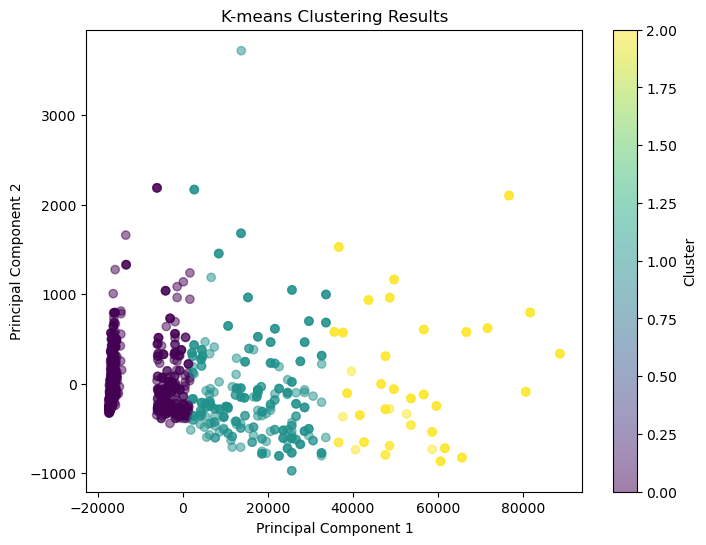

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensionality
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features3)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot data points with cluster assignments
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.5)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results')

# Add color bar legend
plt.colorbar(label='Cluster')

plt.show()


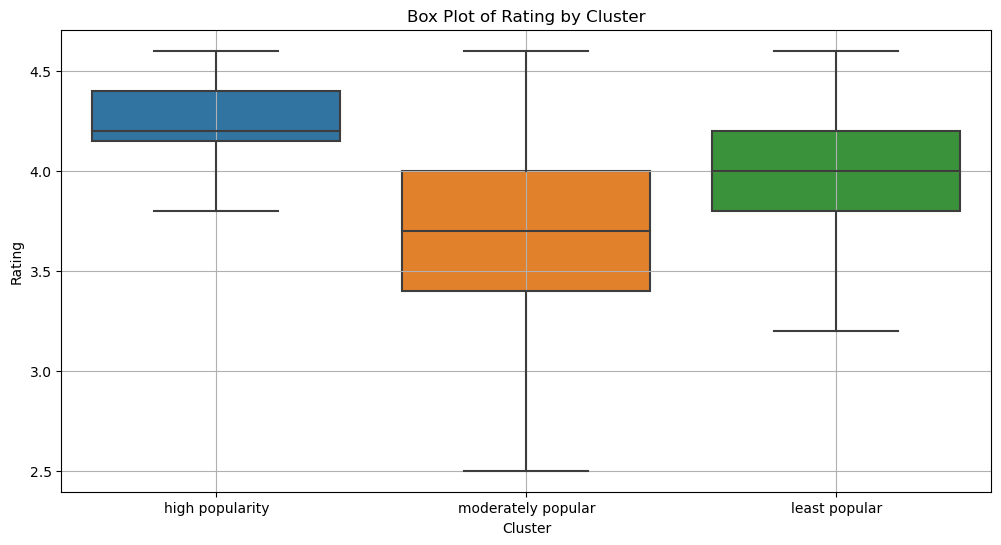

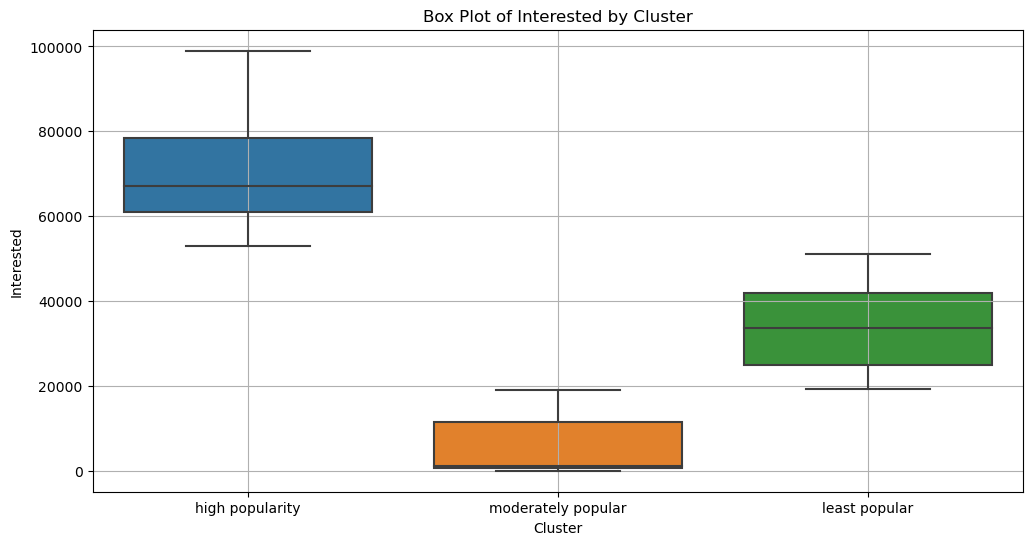

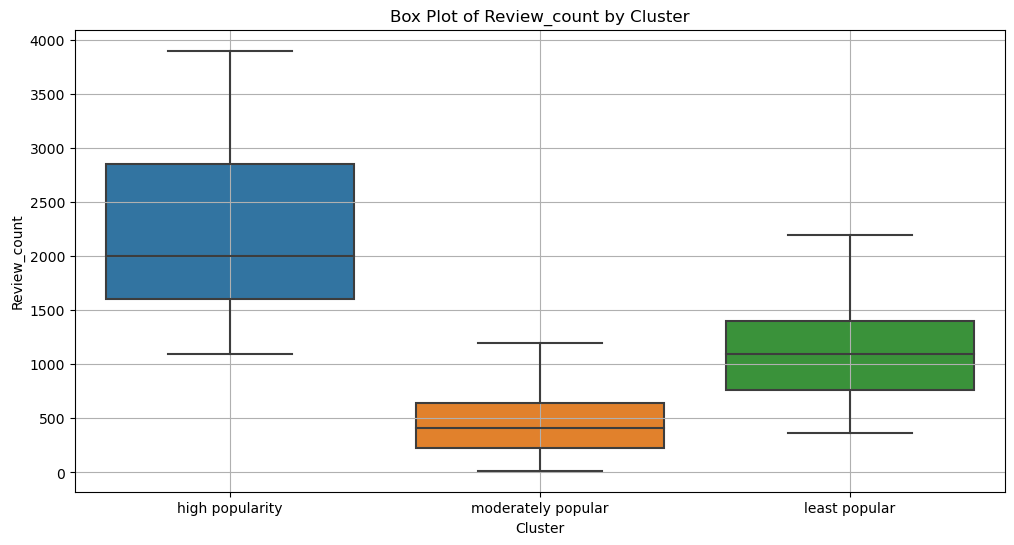

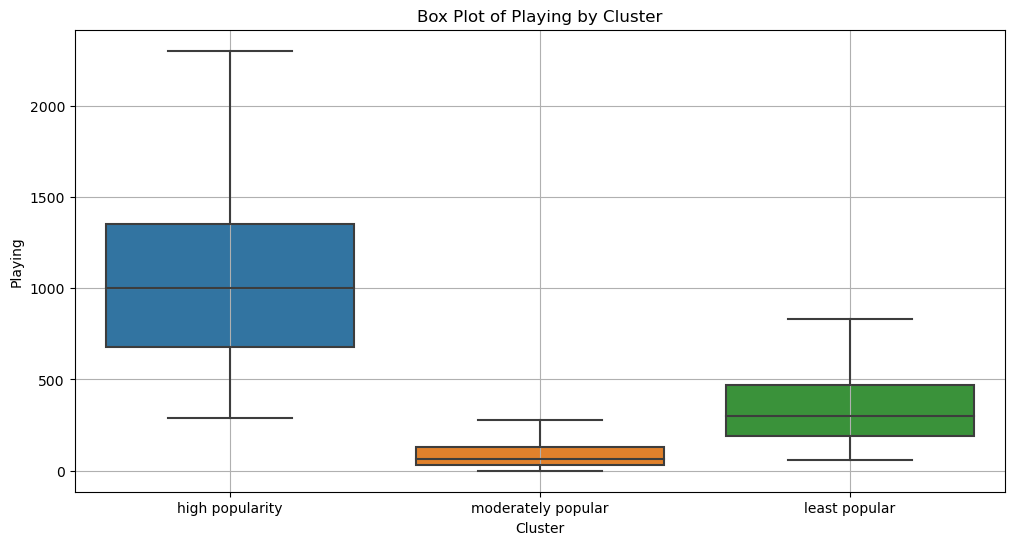

In [58]:
positive_games['clusters']=clusters
# Create box plots for each feature, grouped by cluster
cluster_labels = {1: 'least popular', 0: 'moderately popular', 2: 'high popularity'}

for feature in features3:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['clusters'].map(cluster_labels), y=feature, data=positive_games,showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

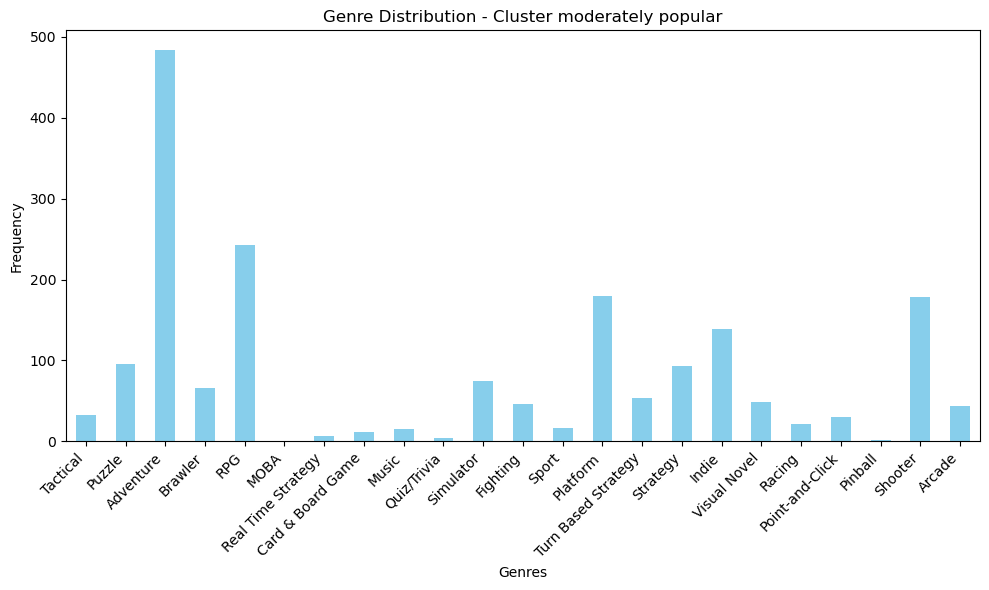

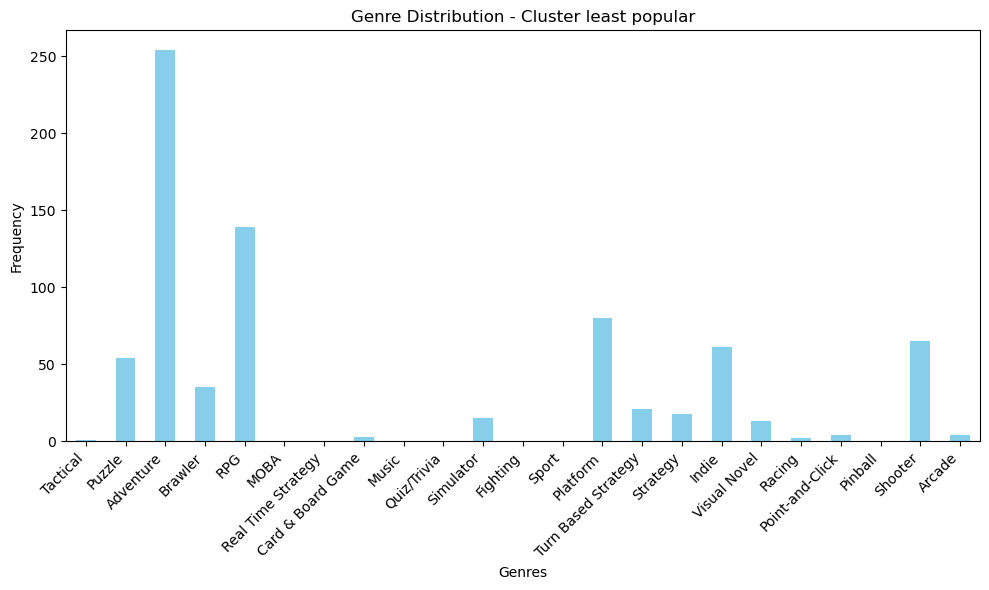

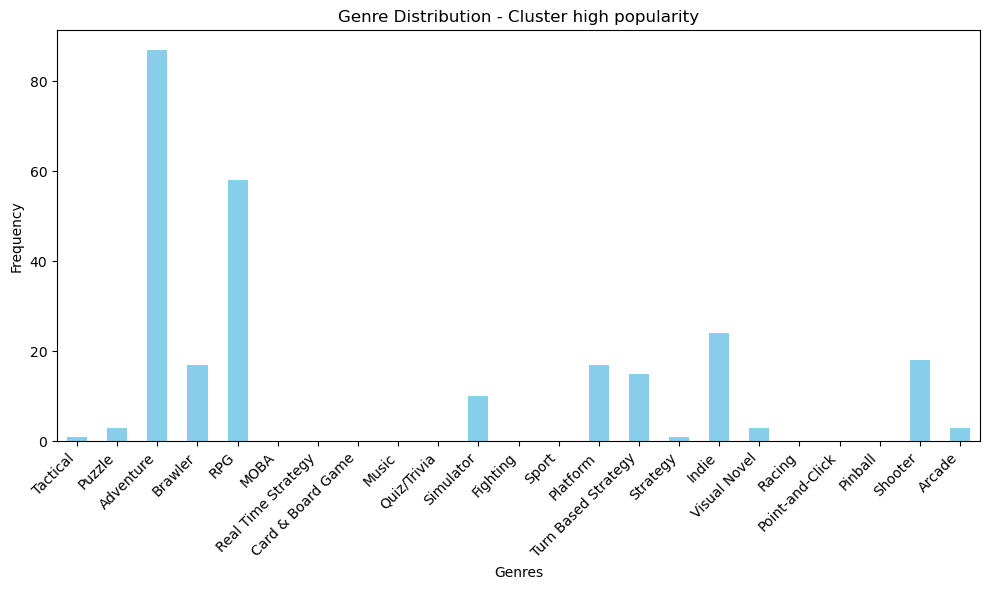

In [59]:
grouped_data = positive_games.groupby('clusters')

# Plot bar charts for each cluster
for cluster, group in grouped_data:
    # Calculate genre frequencies within the cluster
    cluster_genre_frequencies = group[genre_columns].sum()
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    cluster_genre_frequencies.plot(kind='bar', color='skyblue')
    
    # Customize plot labels and title
    plt.title(f'Genre Distribution - Cluster {cluster_labels[cluster]}')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap of labels
    plt.show()

In [60]:
# Define a function to get the top n genres for each cluster
def top_n_genres(group, n=5):
    # Calculate genre frequencies within the cluster
    cluster_genre_frequencies = group[genre_columns].sum()
    # Sort genres by frequency in descending order
    sorted_genres = cluster_genre_frequencies.sort_values(ascending=False)
    # Get top n genres
    top_n = sorted_genres.head(n)
    return top_n


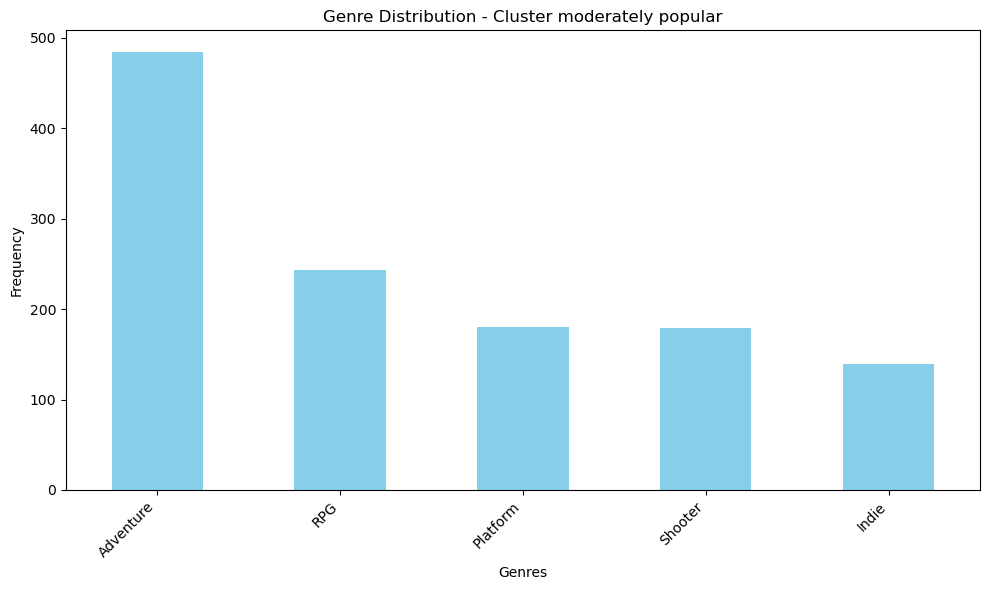

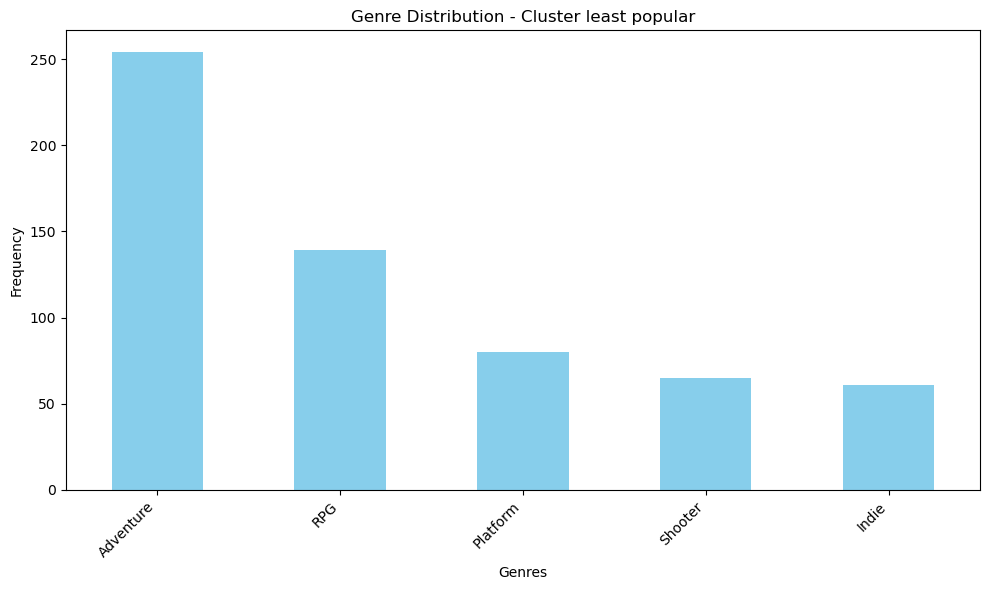

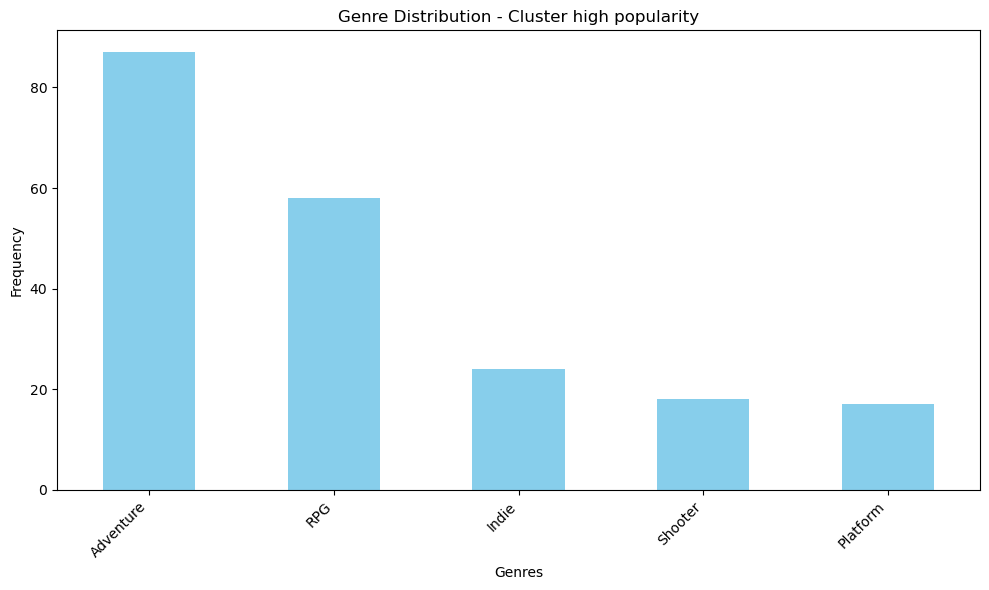

In [61]:
# Plot bar charts for each cluster
for cluster, group in grouped_data:
    # Get top 3 genres for the cluster
    top_genres = top_n_genres(group)
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    top_genres.plot(kind='bar', color='skyblue')
    
    # Customize plot labels and title
    plt.title(f'Genre Distribution - Cluster {cluster_labels[cluster]}')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap of labels
    plt.show()

Across all cluster groups, Adventure and RPG genres consistently emerge as the top two genres, underscoring their universal popularity and enduring appeal among players. With constant high rating over the years as well from EDA, their consistent high frequency indicates a strong preference for immersive storytelling, exploration, and role-playing experiences across diverse player demographics.

these 2 genres can provide a solid foundation for innovation and creativity within the gaming industry. Developers can build upon the established principles and elements of these genres to create new and innovative gaming experiences with other genres.

The varying frequency of Indie and Shooter genres across clusters suggests differences in player engagement levels or preferences. Indie or shooter games can have different, artstyles, achievements goals, storries and more. The varying frequency might mean that only certain indie or shooter games have appealed to players, especially as seen in EDA, where the ratings of both shooting and indie games are either high or low.

Conduct of deeper analysis, possibly through surveys, focus groups, or player interviews, to understand the specific features, themes, and aspects of Indie and Shooter games that appeal to player could be done to find out hwhat time would make the game most likely popular.

According to exploratory data analysis (EDA), Brawler genre actually has been becoming increasingly but slowly popular with constant good ratings since 2006. Despite not being among the top genres in overall popularity, the steady rise in interest and sustained positive ratings suggest a growing niche audience or a resurgence of interest in brawler-style games over time. This fact is furtehr backed up by the fact that the Brawler can only be seen as the top 5 genres in high populairty cluster.

Game developers and publishers can leverage this insight to capitalize on the growing popularity of the Brawler genre by creating innovative and engaging titles that cater to the specific preferences of players interested in dynamic combat and multiplayer interactions characteristic of brawler games.

In [65]:
positive_games.to_csv('postive_games_clusters')